In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

read_file = "analyst.csv"
# 读取文件获得数据
data = pd.read_csv(read_file, encoding="gbk")
# 去除数据中无关的列
data = data[:].drop(['ID'], axis=1)
# 描述性统计
data.describe()

,学历要求,工作经验,薪资
count,450,450,450
unique,4,6,75
top,本科,3-5年,10k-20k
freq,387,192,63


从描述性统计可以看出每个属性对应值的个数以及有多少个不同的值，接下来分别查看每个属性下有什么值。

In [2]:
print(data['学历要求'].unique())
print(data['工作经验'].unique())
print(data['薪资'].unique())

['大专' '本科' '不限' '硕士']
['3-5年' '不限' '5-10年' '1-3年' '1年以下' '应届毕业生']
['8k-15k' '10k-20k' '5k-10k' '20k-40k' '4k-8k' '30k-50k' '15k-30k'
 '10k-15k' '15k-25k' '13k-26k' '25k-35k' '2k-4k' '18k-32k' '14k-25k'
 '12k-22k' '13k-25k' '20k-30k' '8k-12k' '12k-20k' '8k-16k' '13k-20k'
 '6k-9k' '9k-18k' '5k-9k' '8k-10k' '12k-16k' '8k-11k' '14k-20k' '5k-7k'
 '20k-35k' '6k-8k' '25k-50k' '7k-10k' '12k-24k' '7k-12k' '18k-35k'
 '11k-20k' '16k-26k' '7k-14k' '18k-25k' '15k-20k' '6k-12k' '30k-40k'
 '12k-18k' '9k-15k' '10k-14k' '11k-16k' '8k-13k' '6k-10k' '20k-25k'
 '18k-30k' '17k-23k' '4k-7k' '2k-3k' '8k-14k' '16k-30k' '4k-5k' '18k-36k'
 '20K-40K' '13k-18k' '3k-6k' '15K-30K' '25k-40k' '23k-46k' '10k-18k'
 '35k-65k' '30k-45k' '30k-60k' '25k-45k' '40k-70k' '14k-18k' '5k-8k'
 '3k-5k' '16k-24k' '15k-27k']


从上述可以看到，学历要求和工作经验的值比较少且没有缺失值与异常值，可以直接进行分析；但薪资的分布比较多，总计有75种，为了更好地进行分析，我们要对薪资做一个预处理。根据其分布情况，可以将它分成【5k 以下、5k-10k、10k-20k、20k-30k、30k-40k、40k 以上】，为了更加方便我们分析，取每个薪资范围的中位数，并划分到我们指定的范围内。

In [3]:
# 对薪资进行预处理
def pre_salary(data):
    salarys = data['薪资'].values
    salary_dic = {}
    for salary in salarys:
        # 根据'-'进行分割并去掉'k',分别将两端的值转换成整数
        min_sa = int(salary.split('-')[0][:-1])
        max_sa = int(salary.split('-')[1][:-1])
        # 求中位数
        median_sa = (min_sa + max_sa) / 2
        # 判断其值并划分到指定范围
        if median_sa < 5:
            salary_dic[u'5k以下'] = salary_dic.get(u'5k以下', 0) + 1
        elif median_sa > 5 and median_sa < 10:
            salary_dic[u'5k-10k'] = salary_dic.get(u'5k-10k', 0) + 1
        elif median_sa > 10 and median_sa < 20:
            salary_dic[u'10k-20k'] = salary_dic.get(u'10k-20k', 0) + 1
        elif median_sa > 20 and median_sa < 30:
            salary_dic[u'20k-30k'] = salary_dic.get(u'20k-30k', 0) + 1
        elif median_sa > 30 and median_sa < 40:
            salary_dic[u'30k-40k'] = salary_dic.get(u'30k-40k', 0) + 1
        else:
            salary_dic[u'40以上'] = salary_dic.get(u'40以上', 0) + 1
    print(salary_dic)
    return salary_dic
  

导入相关包并做好相应设置

In [4]:
import matplotlib.pyplot as plt
import matplotlib.style as psl
psl.use('seaborn-colorblind')    # 设置图表风格
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签

In [5]:
# 绘制环状图
def draw_pie(dic):
    labels = []
    count = []
    
    for key, value in dic.items():
        labels.append(key)
        count.append(value)
        
    fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(aspect="equal"))

    # 绘制饼状图，wedgeprops 表示每个扇形的宽度
    wedges, texts = ax.pie(count, wedgeprops=dict(width=0.5), startangle=0)
    # 文本框设置
    bbox_props = dict(boxstyle="square,pad=0.9", fc="w", ec="k", lw=0)
    # 线与箭头设置
    kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
              bbox=bbox_props, zorder=0, va="center")

    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        # 设置文本框在扇形的哪一侧
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        # 用于设置箭头的弯曲程度
        connectionstyle = "angle,angleA=0,angleB={}".format(ang)
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        # annotate()用于对已绘制的图形做标注，text是注释文本，含 'xy' 的参数跟坐标点有关
        text = labels[i] + ": " + str('%.2f' %((count[i])/sum(count)*100)) + "%"
        ax.annotate(text, size=13, xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                     horizontalalignment=horizontalalignment, **kw)
    plt.show()

先对学历要求进行分析，绘制环状图

{'大专': 20, '本科': 387, '不限': 19, '硕士': 24}


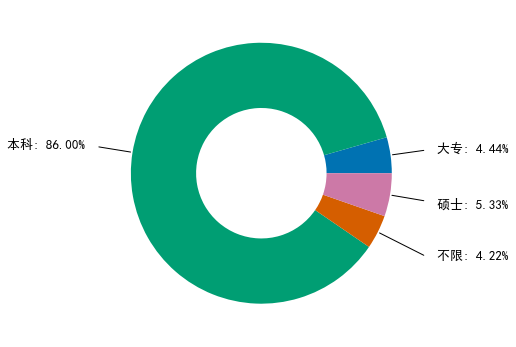

In [6]:
def draw_education(data):
    educations = list(data[u'学历要求'].values)
    edu_dic = {}
    
    for education in educations:
        edu_dic[education] = edu_dic.get(education, 0) + 1
    print(edu_dic)
    # edu_series = pd.Series(edu_dic)
    draw_pie(edu_dic)
    
draw_education(data)

python数据分析师的学历大部分要求是本科，占了86%，接下来对“工作经验”进行可视化，用柱状图表示

{'3-5年': 192, '不限': 34, '5-10年': 44, '1-3年': 163, '1年以下': 7, '应届毕业生': 10}


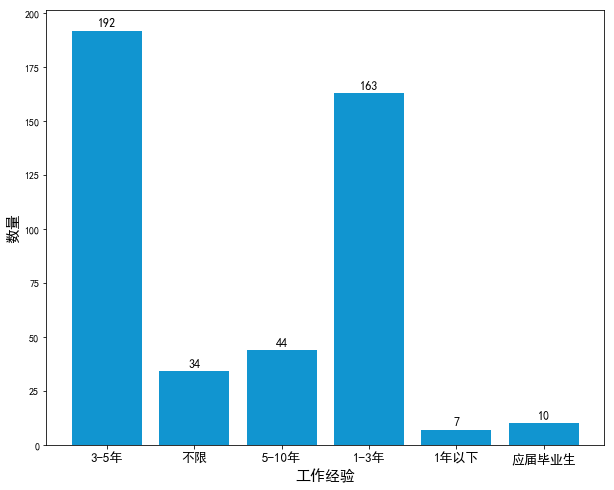

In [7]:
def draw_workYear(data):
    workyears = list(data[u'工作经验'].values)
    wy_dic = {}
    labels = []
    count = []
    # 得到工作经验对应的数目并保存到count中
    for workyear in workyears:
        wy_dic[workyear] = wy_dic.get(workyear, 0) + 1
    print(wy_dic)
    # wy_series = pd.Series(wy_dic)
    # 分别得到 count 的 key 和 value
    for key, value in wy_dic.items():
        labels.append(key)
        count.append(value)
    # 生成 keys 个数的数组
    x = np.arange(len(labels)) + 1
    # 将 values 转换成数组
    y = np.array(count)
    
    fig, axes = plt.subplots(figsize=(10, 8))
    axes.bar(x, y, color="#1195d0")
    plt.xticks(x, labels, size=13, rotation=0)
    plt.xlabel(u'工作经验', fontsize=15)
    plt.ylabel(u'数量', fontsize=15)
    
    # 根据坐标将数字标在图中，ha、va 为对齐方式
    for a, b in zip(x, y):
        plt.text(a, b+1, '%.0f' % b, ha='center', va='bottom', fontsize=12)
    plt.show()

draw_workYear(data)

从柱状图可以看出，python数据分析师的工作经验绝大部分要求1-5年。接下来对薪资状况进行分析，绘制饼图，为了不增加工作量，直接使用前面绘制好的图。

{'10k-20k': 179, '5k-10k': 47, '40以上': 114, '20k-30k': 91, '5k以下': 8, '30k-40k': 11}


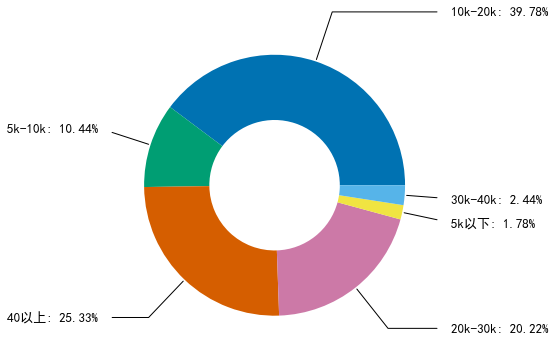

In [8]:
def draw_salary(data):
    salary_dic = pre_salary(data)
    draw_pie(salary_dic)
draw_salary(data)

由此可以得出python数据分析的工资为10k-20k的比较多，40以上的也不少，工资高估计要求会比较高，所以把抓取下来的职位要求有关的文本文件绘制成词云图，看一下要求。

In [9]:
# 读取文件获得文字
def read_txt(file_name):
    with open(file_name, 'r', encoding='utf-8') as file:
        text = file.read()
        file.close()
    return text

In [10]:
# 用 jieba 对文本进行分割，并去掉频率比较高的停用词
import jieba
def cut_text(text):
    stopwords =['熟悉','技术','职位','相关','工作','开发','使用','能力',
                '优先','描述','任职','经验','经验者','具有','具备','以上','善于',
                '一种','以及','一定','进行','能够','我们']
    for stopword in stopwords:
        jieba.del_word(stopword)
    
    words = jieba.lcut(text)
    content = " ".join(words)
    return content

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ADMINI~1\AppData\Local\Temp\jieba.cache
Loading model cost 2.404 seconds.
Prefix dict has been built succesfully.


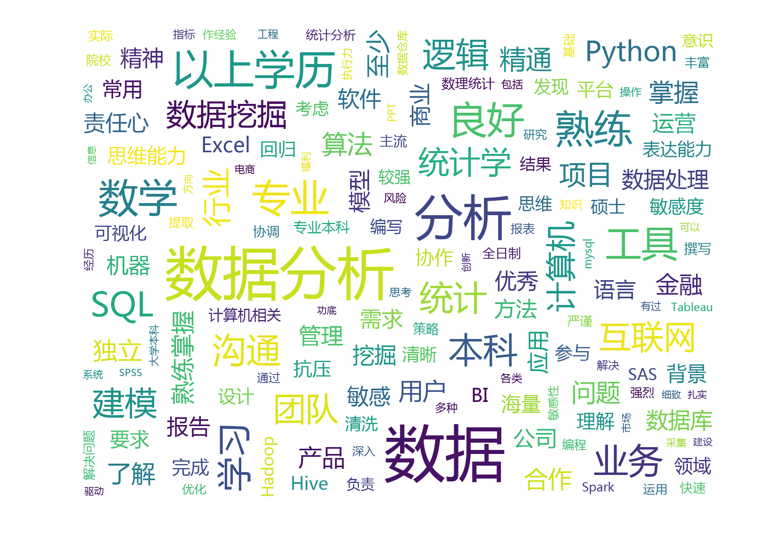

In [11]:
from wordcloud import WordCloud
# 绘制词云图
def draw_wordcloud(content):
    
    wc = WordCloud(
        font_path = 'c:\\Windows\Fonts\msyh.ttf',
        background_color = 'white',
        max_font_size=150,  # 字体最大值
        min_font_size=24,  # 字体最小值
        random_state=800, # 随机数
        collocations=False, # 避免重复单词
        width=1600,height=1200,margin=35, # 图像宽高，字间距
    )
    wc.generate(content)

    plt.figure(dpi=160) # 通过这里可以放大或缩小
    plt.imshow(wc, interpolation='catrom',vmax=1000)
    plt.axis("off") # 隐藏坐标
    
text = read_txt('description.txt')
content = cut_text(text)
draw_wordcloud(content)

从词云图可看出，数据分析肯定要对数据比较敏感，并且对统计学、excel、python、数据挖掘、hadoop等也有一定的要求。不仅如此，还要求具有一定的抗压能力、解决问题的能力、良好的表达能力、思维能力等。